# COGS 118A - Final Project

# Insert title here

## Group members

- Yilin Zhu

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

In this project, we want to predict customer churn for a telecom company using the Telco Customer Churn dataset from IBM company. The data contains information about a telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.I will use machine learning algorithms to analyze the data and predict customer churn. One goal is identifying which factors are most strongly associated with churn. I will use various models and algorithms, including logistic regression, decision trees, and random forests to compare their performance. And I will use techniques such as cross validation to select the best model. The success will be measured using metrics such as accuracy, precision, recall, and F1 score: they will give me a comprehensive understanding of the model's performance. The ultimate goal is helping the telecom company to better understand their customers and take proactive steps to reduce churn rates and improve customer retention.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 


Customer churn prediction is a crucial problem in the field of business analytics. It has been studied extensively by practitioners from various field in the business world<a name="name1"></a>[<sup>[1]</sup>](#name1n). The motive for studying this sort of problem is to predict whether a customer is likely to leave a company's service so that the companies could come up with proactive schemes to retain their customers and maintain the stability of revenue flows. One hypothesis is that the tenure would be one of the deciding factors: longer then tenure, less likely the customer churn would happen. This is because intuitively people were less likely to make a change when they used the service from the company for a long time. Intuitively, their consumption habits may not change drastically.\
To begin with, we have a Telco Customer Churn dataset from IBM Business Analytics<a name="name2"></a>[<sup>[2]</sup>](#name2n), and it has been used by practitioners to develop and test machine learning models. The dataset consists important customer information such as tenure, total charges, subscriptions, and contract type. The final prediction variable is customer churn.\
The approaches include employing Machine learning algorithms such as logistic regression, random forests, decision trees, support vector machine and neural networks could be used to predict customer churn. Previous studies have shown that the models combining multiple algorithms perform better than individual models<a name="name3"></a>[<sup>[3]</sup>](#name3n). For this project, I would use different algorithms seperately and compare the performance of these algorithms as well as the model selections.\
The performance of the machine learning models would be evaluated using metrics such as accuracy, precision, recall, and F1 score. Cross-validation and hyperparameter tuning techniques are widely used to optimize the model's performance<a name="name4"></a>[<sup>[4]</sup>](#name4n).

# Problem Statement

In this problem, we need to predict customer churn for a telecommunication company with supervised machine learning methods. Here is a definition of Customer Churn: it is a phenomenon that customers stop doing business with a company and switch to that company's competitor. In the context of a teleco company, churn can be caused by various factors such as increased price, poor customer service, and better offers from competitors. The problem is quantifiable because the ultimate goal is predicting whether a customer will churn or not (binary classification) based on features such as their tenure, contract type, payment method, etc. Such problem could be further expressed with classification algorithms. We measure the performance of the algorithms and models with a rainbow of metrics such as precision, recall, F1 score, and AUC-ROC curve. The problem is replicable since it can be reproduced using the same dataset and features to train and test various supervised machine learning models to predict customer churn for other similar companies or for a same company with data in the future.

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


Link: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In this project, we are using the Telco Customer Churn dataset from IBM Business Analytics. This dataset consists of customer information for a telecommunications company, including their tenure, satisfaction score, churn score, and customer lifetime value. Other importan variables involves customer demographics (such as gender and age), account information (such as contract type and payment method), and usage patterns (such as monthly charges and total charges).This dataset contains 7043 observations and 21 variables, with each observation representing a unique customer with a unique id.

One crucial variable in this dataset is the "Churn" variable: it indicates whether or not a customer has declined the company's service. This variable will be used as the target variable in our machine learning models, and it would be used for testing accuracy. Another important variable is "Tenure," which represents the length of time a customer has been with the company. This variable would have a significant impact on a customer's likelihood of churning for the reason that customers who have been with the company for a longer period of time may be more likely to stay.

We cleaned the data by dropping unecessary features such as customer IDs. We clean the data by modifying some NA values. Since there aren't many, we don't need to worry to much. We convert the feature "TotalCharges" into numeric as it should be. The data summary are shown so we can understand the structure of the data better.Since there are many categorical variables, we will use one-hot encoding to transform those variables into numerical values i.e. 0 or 1. We perform exploratory data analysis to see the correlation between each feature and the variable "churn". Since there are many binary variables, we perform the Fisher test to understand the importance. Certain normalizations are performed to balance the importance of different variables into an appropriate level.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Import data
data = pd.read_csv('CustomerChurn.csv')
# View summary information
print("Data summary:")
print(data.info())
print()

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [3]:
# Replace empty values with 0 and change data type into numeric
data['TotalCharges'].replace(" ", 0, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)

for index, row in data.iterrows():
    if row['TotalCharges'] == 0:
        data.at[index, 'TotalCharges'] = row['MonthlyCharges']

# View Statistics
print("DataFrame summary statistics:")
print(data.describe())

DataFrame summary statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.798992
std         0.368612    24.559481       30.090047   2266.730170
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [4]:
# Create a new dataframe for feature selection
df = data.drop('customerID', axis=1)
for col in df.columns:
    unique_options = df[col].unique()
    print(f"{col}:")
    print(unique_options)
    print()

gender:
['Female' 'Male']

SeniorCitizen:
[0 1]

Partner:
['Yes' 'No']

Dependents:
['No' 'Yes']

tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService:
['No' 'Yes']

MultipleLines:
['No phone service' 'No' 'Yes']

InternetService:
['DSL' 'Fiber optic' 'No']

OnlineSecurity:
['No' 'Yes' 'No internet service']

OnlineBackup:
['Yes' 'No' 'No internet service']

DeviceProtection:
['No' 'Yes' 'No internet service']

TechSupport:
['No' 'Yes' 'No internet service']

StreamingTV:
['No' 'Yes' 'No internet service']

StreamingMovies:
['No' 'Yes' 'No internet service']

Contract:
['Month-to-month' 'One year' 'Two year']

PaperlessBilling:
['Yes' 'No']

PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges:
[29.85 56.95 53.85 ... 63.1  44.2 

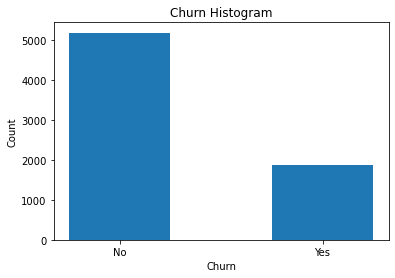

No     5174
Yes    1869
Name: Churn, dtype: int64


In [5]:
churn_counts = df["Churn"].value_counts()

# Plot the histogram
plt.bar(churn_counts.index, churn_counts.values, width=.5)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Histogram")
plt.xticks(churn_counts.index)
plt.show()

print(churn_counts)

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

An ideal solution is implementing different binary classification algorithms such as logistic regression, support vector machines, and random forest. Since the goal is to predict whether a customer will churn or not based on the level of importance for different variables, I may want to conduct PCA to perform dimension reduction. Generally, this problem could be solved with supervised machine learning methods: we need to split the data into training, testing, and validation sections. Specifically, I train the model based on the provided "churn" label: customers who have churned and those who have not. Cross validation should be performed as the size of the dataset is not very big.

- **Exploratory Data Analysis (EDA):** \
    I need to summarize the main characteristics of a dataset by visualizing the variables. This enables me to gain more insight about the data. The goal of EDA is to understand the distribution of the data and detect any outliers. Fortunately, some variables could be removed directly by observing the distributions when I identify patterns among variables.

- **Preprocess Data:** \
    Data Cleaning. Perform one-hot encoding.

- **Dimension Reduction & Feature Selection:** \
    Since there are 21 variables, it potentially includes a lot of noise. So I may want to remove the features with little impact in decision making. Ideally, Principal Component Analysis should be performed. I may want to use XGBoost. Or I could use the result from EDA and remove some features based on reasoning.

- **Algorithms:** \
    Since customer churn is a classification problem, we could use the following algorithms.
    * **Support Vector Machine**\
        SVM is a good fit for classification and regression tasks. It will try to find the hyperplane that best separates (maximizes the margin) the data into different classes. In the context of customer churn, aregular SVM would work fine. We can use it to predict whether a customer is likely to churn or not based on various features like their tenure, demographics, usage patterns, etc. It is also a great algorithm for data that need to draw nonlinear decision boundaries. We could use the kernel trick to map the original features to a higher dimensional space.
    * **K Nearest Neighbors**\
        KNN is a non-parametric algorithm that could be used in classification tasks. The output is based on the k-nearest data points in the training set. The training process is basically storing the data. The testing could consume more time as it needs to calculate the distance pairwise. In the context of customer churn, we can use KNN to predict whether a customer is likely to churn based on the similar customers in the training set.
    * **Logistic Classification**\
         It is a statistical algorithm used for classifications. The underlying mechanics is maximum likelihood optimization. In the context of customer churn, we can use logistic regression to predict whether a customer is likely to churn or not.
    * **Decision Tree**\
        It is a non-parametric algorithm. Specifically, the algorithm creates a tree-like model of decisions and their possible consequences. Mathematically, it tries different threshold to maximize the information gain. Meaning that at each spliting stage, it finds the feature that best seperate customer from churn and stay. 

- **Model Selection:** \
    Use  k-fold cross-validation to ensure the model's performance is reliable and robust.Try different algorithms and tune the hyperparameter to enhance the result. Hyperparameters such as regularization strength or number of trees in the random forest could be changed using grid search or randomized search to improve model performance.

- **Algorithm evaluation:** \
    Employ nested cross validation. Use different metrics for evaluation. See below.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).


For the model and algorithm evaluation metrics, we will use recall, sensitivity, F1-score, accuracy, and AUC-ROC. 

- $\textbf{Recall} = \frac{\text{TP}}{\text{TP + FN}}$

    It is the proportion of actual positives that are correctly identified by the model. In our context, it is the probability of successful identification of customer churns given that customer churns happen. Essentially, we want to maximize this metric to have a more accurate model.
    

- $\textbf{Precision} = \frac{\text{TP}}{\text{TP+FP}}$

    It is the fraction of actual positives given among all positive predictions made by the model. In our project, it helps us see the performance of our model because it measure the probability of correct predictions given that the model makes a positive prediction. Namely, it refers to the proportion of customers who are predicted to churn and actually do churn, out of all the customers who are predicted to churn.
 
 
- $\textbf{Accuracy} = \frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}$

    This would evaluate the fraction of correct predictions among all predictions.
    
    
- $\textbf{F1-score} = \frac{\text{2 * Precision * Recall}}{\text{Precision + Recall}}$

    When comparing 2 models, it is likely that model A has a higher precision and model B has a higher recall. When this happen, we want to pick a model that have a relatively balanced value between precision and recall. We could compare the F1-scores because it represents the harmonic mean of precision and recall.
    
    
- $\textbf{Receiver Operating Characteristic (AUC-ROC)}$

    ROC is generated by plotting the true positive rate against the false positive rate at various thresholds.\
    In this context, the threshold is a value between 0 and 1. For example, when a logistic model output 0.75 as a probability that a customer churn may happen, the final decision really depends on the threshold value: if we set the threshold to be 0.8, then it would still be classified as negative even with a high value.\
    Ideally, we want to pick a threshold that make the TPR to be 1 for any FPR.\
    The AUC is the area under the ROC curve. A good classifier would have an AUC of 1: it rank all positive samples higher than negative samples for any threshold value. This is what we want because we want the model to have a strong ability to identify actual customer churns. We won't care too much about the negatives (customers stay) as it is not a loss for the company.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation.
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters

**To be complete in coming days:**
- more metrics
- tuning the feature weight
- generate graph to compare models
- (ensemble?)

## EDA & Feature Selection

Analyze **categorical features** and perform feature selection for those features.

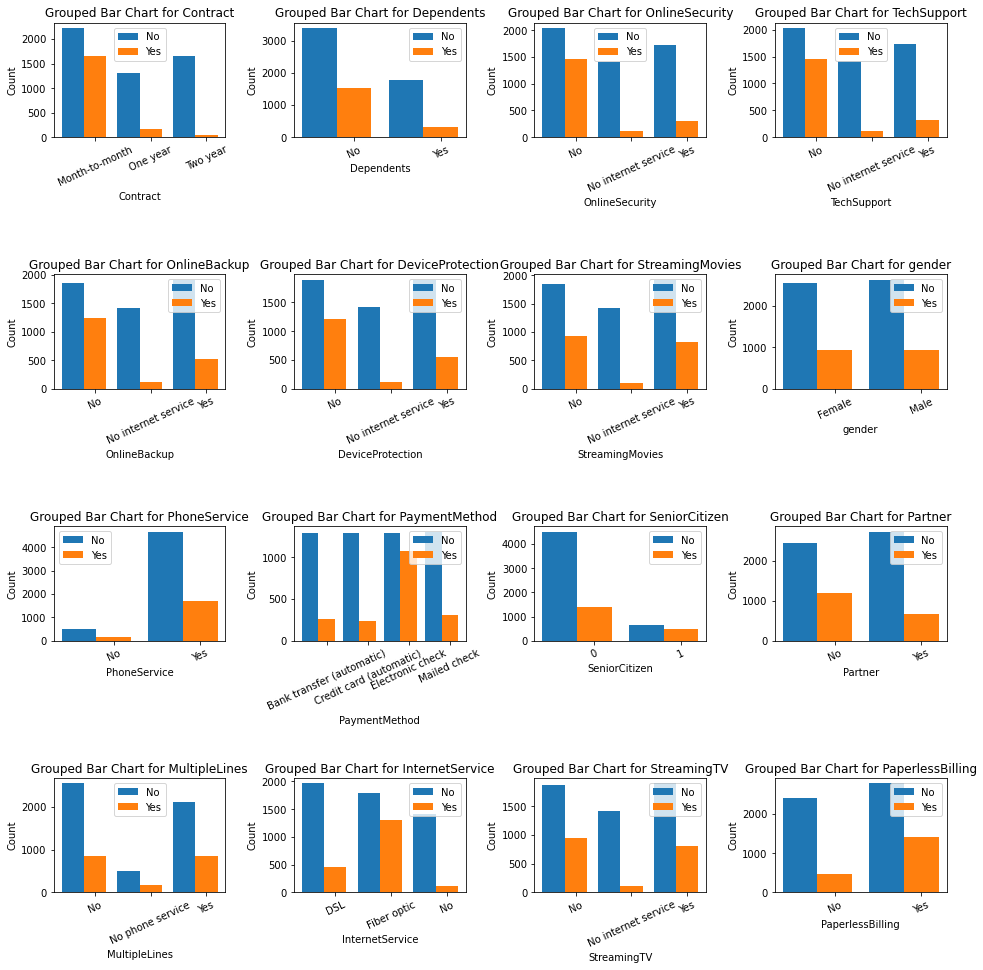

In [6]:
churn_categories = df['Churn'].unique()
categorical_features = {'gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                       'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                       'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'}

fig, axes = plt.subplots(4, 4, figsize=(16, 16))


for i, feature in enumerate(categorical_features):
    
    # contingency table
    contingency_table = pd.crosstab(df['Churn'], df[feature])
    
    # Get the corresponding subplot axes
    ax = axes[i // 4, i % 4]

    # Plot grouped bar charts
    categories = contingency_table.columns
    x = np.arange(len(categories))
    width = 0.4

    for j, churn_category in enumerate(churn_categories):
        counts = contingency_table.loc[churn_category].values
        ax.bar(x + (j * width), counts, width, label=churn_category)

    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Grouped Bar Chart for {feature}')
    ax.set_xticks(x + (len(churn_categories) * width) / 2)
    ax.set_xticklabels(categories, rotation=25)
    
    ax.legend()

# Remove empty subplots if the number of features is less than 16
# if len(categorical_features) < 16:
#    for i in range(len(categorical_features), 16):
#        fig.delaxes(axes[i // 4, i % 4])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=1.2)

# Show the plot
plt.show()

With contingencies table and grouped bar chart, we have a good visualization to better understand the relationship between categorical data and customer churn. We now perform **Fisher-test** for binary features and **Chi-square test** for other categorical variables. 

#### Fisher Test

In [7]:
# Fisher-test
binary_features = {'gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling'}
for feature in df.columns:
    if feature in binary_features:
        contingency_table = pd.crosstab(df['Churn'], df[feature])
        p_value = stats.fisher_exact(contingency_table)[1]
        print(f"Feature: {feature}\np-value: {p_value}\n")

Feature: gender
p-value: 0.4828768285728746

Feature: SeniorCitizen
p-value: 2.789600990171971e-34

Feature: Partner
p-value: 6.920158767992954e-37

Feature: Dependents
p-value: 4.829268837480821e-46

Feature: PhoneService
p-value: 0.3379594144108129

Feature: PaperlessBilling
p-value: 1.181266854637732e-60



The features **Gender** and **PhoneService** have relatively high p-value, indicating a less significance in correlations to customer churn.

#### Chi-square Test

In [8]:
# Chi-square test
multi_features = {'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'}
for feature in df.columns:
    if feature in multi_features:
        contingency_table = pd.crosstab(df['Churn'], df[feature])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
        print(f"Feature: {feature}\np-value: {p_value}\n")

Feature: MultipleLines
p-value: 0.0034643829548773

Feature: InternetService
p-value: 9.571788222840544e-160

Feature: OnlineSecurity
p-value: 2.6611496351768565e-185

Feature: OnlineBackup
p-value: 2.0797592160865457e-131

Feature: DeviceProtection
p-value: 5.505219496457244e-122

Feature: TechSupport
p-value: 1.4430840279999813e-180

Feature: StreamingTV
p-value: 5.528994485739024e-82

Feature: StreamingMovies
p-value: 2.667756755723681e-82

Feature: Contract
p-value: 5.863038300673391e-258

Feature: PaymentMethod
p-value: 3.6823546520097993e-140



To visualize the result, we use **Stacked Percentage Bar Chart**. We may understand the significant of the feature better after with these plots.

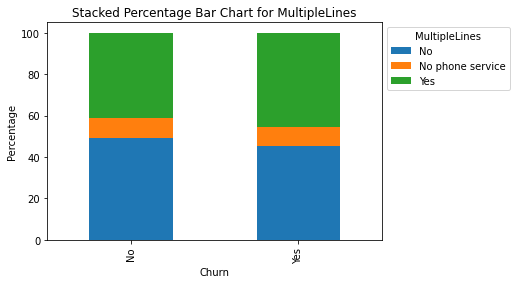

---------------------------------------------------


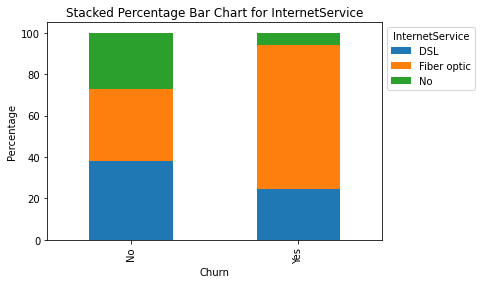

---------------------------------------------------


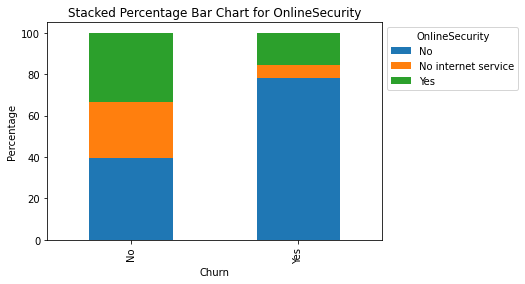

---------------------------------------------------


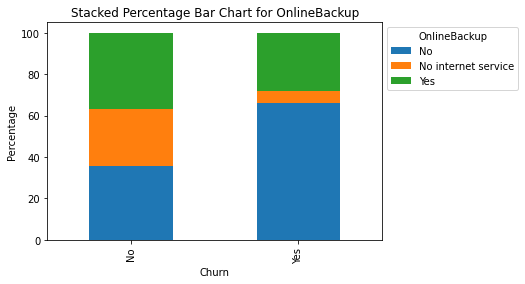

---------------------------------------------------


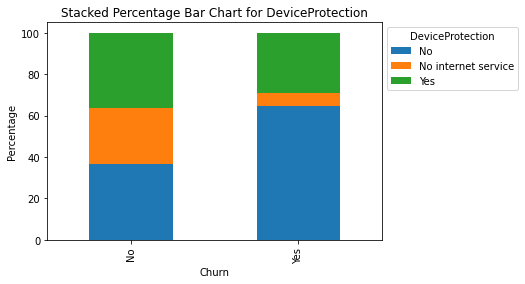

---------------------------------------------------


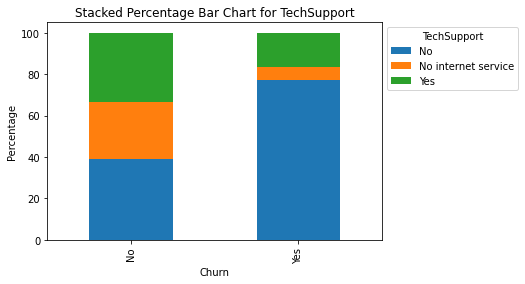

---------------------------------------------------


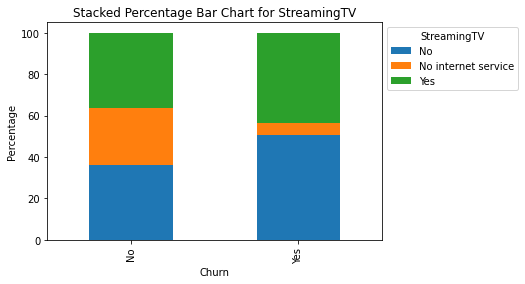

---------------------------------------------------


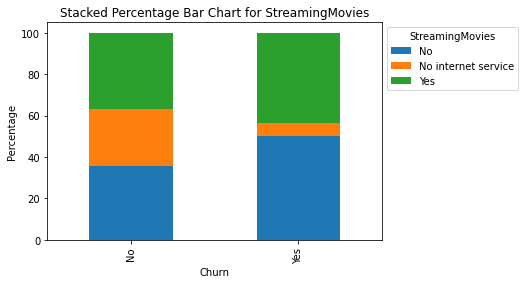

---------------------------------------------------


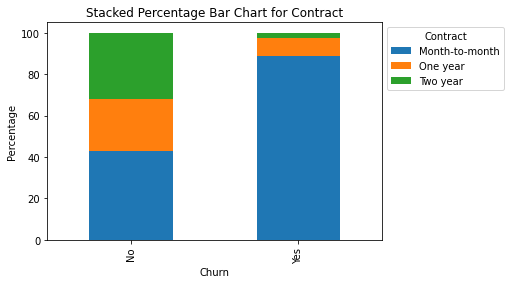

---------------------------------------------------


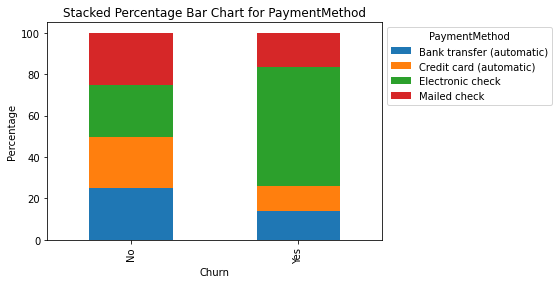

---------------------------------------------------


In [9]:
for feature in df.columns:
    if feature in multi_features:
        contingency_table = pd.crosstab(df['Churn'], df[feature])
        
        # Calculate expected frequencies
        expected = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / df.shape[0]

        
        # Stacked Percentage Bar Chart
        contingency_table_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
        contingency_table_pct.plot(kind='bar', stacked=True)
        plt.xlabel('Churn')
        plt.ylabel('Percentage')
        plt.title(f'Stacked Percentage Bar Chart for {feature}')
        plt.legend(title=feature, bbox_to_anchor=(1, 1))
        plt.show()
        print('---------------------------------------------------')

Inspecting the plot and p-values from Chi-square test, we want to remove the feature **MultipleLines**.

Now analyze **numeric features** (Monthly Charges / Total Charges) and perform feature selection for those features. 

We decide to use **Box plots** to visualize and then use **Two-sample t-test** to test statistical significance.

In [11]:
# Convert the feature Churn (Yes/No) into 1,0
ye_no_map = {'Yes':1, 'No':0}
df['Churn'] = df['Churn'].map(ye_no_map)

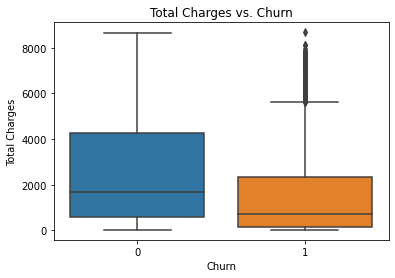

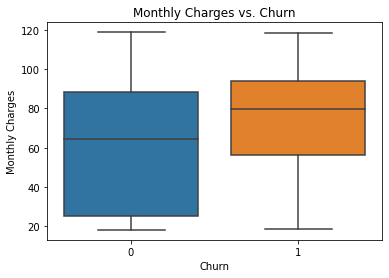

In [12]:
# Create sub dataframe for monthly charges and total charges
df_TC_C = df[['TotalCharges', 'Churn']]
df_MC_C = df[['MonthlyCharges', 'Churn']]

# Create a box plot
sns.boxplot(x='Churn', y='TotalCharges', data=df_TC_C)
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Total Charges vs. Churn')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df_MC_C)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

In [13]:
churned_total_charges = df[df['Churn'] == 1]['TotalCharges']
not_churned_total_charges = df[df['Churn'] == 0]['TotalCharges']

churned_monthly_charges = df[df['Churn'] == 1]['MonthlyCharges']
not_churned_monthly_charges = df[df['Churn'] == 0]['MonthlyCharges']

# Perform two-sample t-test for TotalCharges
t_statistic, p_value = stats.ttest_ind(churned_total_charges, not_churned_total_charges)
# Print
print("Two-sample t-test (TotalCharges):")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print()

# Perform two-sample t-test for MonthlyCharges
t_statistic, p_value = stats.ttest_ind(churned_monthly_charges, not_churned_monthly_charges)
# Print
print("Two-sample t-test (MonthlyCharges):")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Two-sample t-test (TotalCharges):
t-statistic: -16.980809736114267
p-value: 2.057691578421339e-63

Two-sample t-test (MonthlyCharges):
t-statistic: 16.53673801593631
p-value: 2.706645606888261e-60


Both Monthly Charges and Total Charges are closely correlated to Customer Churn. So we need to keep them. Now drop Gender, PhoneService, MultipleLines as discussed.

In [14]:
columns_to_drop = ['gender', 'PhoneService', 'MultipleLines']
df = df.drop(columns=columns_to_drop)

Now we perform **One-hot encoding**

In [15]:
# Perform One-hot Encoding
columns_to_encode = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', ]
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

# Map binary variables into 1 or 0
ye_no_map = {'Yes':1, 'No':0}

encoded_df['Partner'] = encoded_df['Partner'].map(ye_no_map)
encoded_df['Dependents'] = encoded_df['Dependents'].map(ye_no_map)
encoded_df['PaperlessBilling'] = encoded_df['PaperlessBilling'].map(ye_no_map)

In [16]:
encoded_df

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,1,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,1,1,72,1,103.20,7362.90,0,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,1,11,1,29.60,346.45,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,74.40,306.60,1,0,1,...,1,0,0,1,0,0,0,0,0,1


## Algorithm & Model Analysis

### 1. Base Model: Boosting

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, RocCurveDisplay 
import xgboost as xgb

In [18]:
# Split data
boost_X = encoded_df.drop('Churn', axis=1)
boost_y = encoded_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(boost_X, boost_y, test_size=0.2, random_state=42)

# Calculate the ratio of negative to positive samples in the training set
negative_samples = len(y_train) - np.sum(y_train)
positive_samples = np.sum(y_train)
class_weight = negative_samples / positive_samples
print('(Negative : Positive) is',class_weight)

# Weight the tenure feature


# Create XGBoost classifier
model = xgb.XGBClassifier(scale_pos_weight=class_weight)

# Fit model
model.fit(X_train, y_train)




# Make predictions on the test set
#y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]
print(y_pred_prob.shape)
y_pred = (y_pred_prob >= 0.5).astype(int)

print('Differnce in set:',set(y_test)-set(y_pred))


# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

(Negative : Positive) is 2.766042780748663
(1409,)
Differnce in set: set()
Precision: 0.5496828752642706
Recall: 0.6970509383378016
F1 Score: 0.6146572104018913
Accuracy: 0.7686302342086586


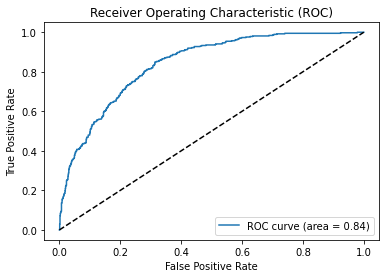

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

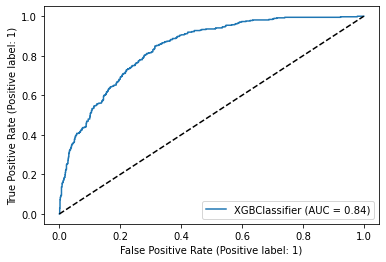

In [20]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

Try to add Grid Search for seeking good parameters

In [21]:
# Initialize the XGBClassifier
xgboost = xgb.XGBClassifier(subsample = 0.4, 
                        colsample_bytree = 0.4, 
                        gamma=5, 
                        objective='binary:logistic',
                        eval_metric = ["auc"],
                      )

# Hypertuning parameters
lr = [0.1,1] 
ne = [100] 
md = [3,4,5]

# Grid Search
clf = GridSearchCV(xgboost,{
    'learning_rate':lr,
    'n_estimators':ne,
    'max_depth':md
},cv = 5,return_train_score = False)

# Fitting the model with the custom weights
feature_weights = np.ones(X_train.shape[1])
feature_weights[3] = 10
clf.fit(X_train,y_train, feature_weights = feature_weights)
clf.cv_results_

{'mean_fit_time': array([0.08878403, 0.10326724, 0.11626225, 0.09225597, 0.10306888,
        0.11536961]),
 'std_fit_time': array([0.00168921, 0.00164224, 0.0017068 , 0.00031357, 0.00134585,
        0.00167784]),
 'mean_score_time': array([0.00337291, 0.00347185, 0.00347199, 0.00327363, 0.00347185,
        0.0034719 ]),
 'std_score_time': array([3.71296717e-04, 2.13248060e-07, 2.86102295e-07, 2.42867803e-04,
        3.13867859e-04, 9.53674316e-08]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 4, 5, 3, 4, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 100, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 '

### Learning curves and validation curves for Boosting

In scikit-learn, it has a learning_curve function that employs the K-Fold cross-validation method. Specifically, it splits the data into K folds and trains the model on a subsets. And it evaluates the model on the remaining folds. We repeat this process for different training set size according to the defined variable train_sizes 

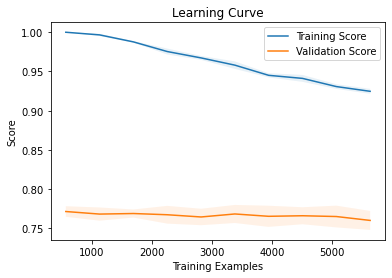

In [22]:
# Define the number of training examples
train_sizes = np.linspace(0.1, 1.0, 10)

# Learning curve scores
train_sizes, train_scores, val_scores = learning_curve(model, boost_X, boost_y, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation for plots
ts_mean = np.mean(train_scores, axis=1)
ts_std = np.std(train_scores, axis=1)
vs_mean = np.mean(val_scores, axis=1)
vs_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, ts_mean, label='Training Score')
plt.plot(train_sizes, vs_mean, label='Validation Score')
plt.fill_between(train_sizes, ts_mean - ts_std, ts_mean + ts_std, alpha=0.1)
plt.fill_between(train_sizes, vs_mean - vs_std, vs_mean + vs_std, alpha=0.1)

# Create labels and title
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### 2. SVM

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
# Split data
X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Create the SVM classifier
svm_model = SVC(kernel='rbf',degree=3, class_weight={0:1, 1:3})

# Train the data
svm_model.fit(X_train, y_train)



# Make predictions on the test set
y_pred_prob = svm_model.decision_function(X_test)
print('Shape of y_pred_prob:',y_pred_prob.shape)
y_pred = (y_pred_prob > 0.6).astype(int)
print('Differnce in set:',set(y_test)-set(y_pred))


# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the cross-validation Accuracy scores
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Scores for Cross-Validation :", cv_scores)
print("Mean Cross Validation Score:", cv_scores.mean())

Shape of y_pred_prob: (1409,)
Differnce in set: set()
Precision: 0.5868852459016394
Recall: 0.4387254901960784
F1 Score: 0.5021037868162693
Accuracy: 0.7480482611781405
Scores for Cross-Validation : [0.68985096 0.66430092 0.6543648  0.68039773 0.671875  ]
Mean Cross Validation Score: 0.6721578811536227


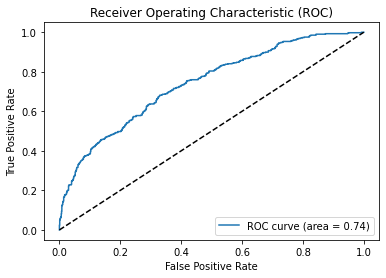

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

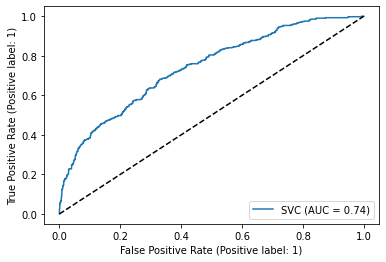

In [26]:
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### Learning curves and validation curves for SVM

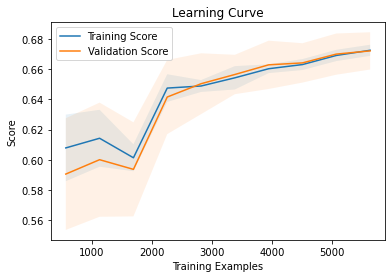

In [27]:
# Define the number of training examples
train_sizes = np.linspace(0.1, 1.0, 10)

# Learning curve scores
train_sizes, train_scores, val_scores = learning_curve(svm_model, X, y, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation for plots
ts_mean = np.mean(train_scores, axis=1)
ts_std = np.std(train_scores, axis=1)
vs_mean = np.mean(val_scores, axis=1)
vs_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, ts_mean, label='Training Score')
plt.plot(train_sizes, vs_mean, label='Validation Score')
plt.fill_between(train_sizes, ts_mean - ts_std, ts_mean + ts_std, alpha=0.1)
plt.fill_between(train_sizes, vs_mean - vs_std, vs_mean + vs_std, alpha=0.1)

# Create labels and title
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### 3. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# Change weight
#feature_weights = {i: 1 for i in range(35)}  # Assign weight 1 to all features
#feature_weights[3] = 5 

# Create Pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0:1,1:3}))
pipe.fit(X_train, y_train)

y_pred_prob = pipe.predict_proba(X_test)[:,1]
print(y_pred_prob.shape)
y_pred = (y_pred_prob >= 0.75).astype(int)

# Check if it is all negative
print('Differnce in set:',set(y_test)-set(y_pred))


# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#pipe.score(X_test, y_test)

(1409,)
Differnce in set: set()
Precision: 0.636963696369637
Recall: 0.5421348314606742
F1 Score: 0.5857359635811836
Accuracy: 0.8062455642299503


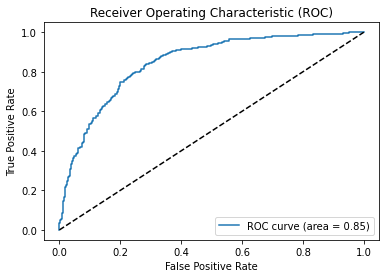

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

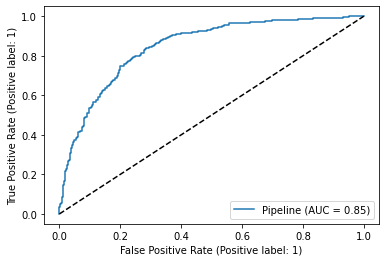

In [31]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7601135557132718

### 4. KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Tuning the decision threshold to address unbalanced weight
y_pred_prob = knn_model.predict_proba(X_test_scaled)[:,1]
print(y_pred_prob.shape)
y_pred = (y_pred_prob>=0.55).astype(int)
print(set(y_test)-set(y_pred))

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

(1409,)
set()
Precision: 0.5906593406593407
Recall: 0.5308641975308642
F1 Score: 0.5591677503250976
Accuracy: 0.759403832505323


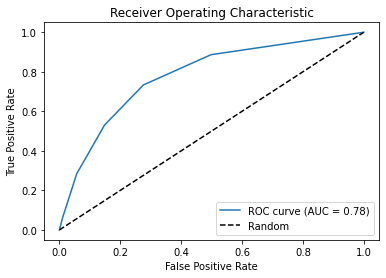

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

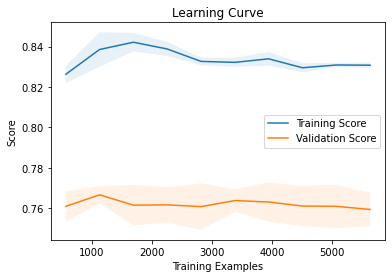

In [36]:
# Define the number of training examples
train_sizes = np.linspace(0.1, 1.0, 10)

# Learning curve scores
train_sizes, train_scores, val_scores = learning_curve(knn_model, X, y, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation for plots
ts_mean = np.mean(train_scores, axis=1)
ts_std = np.std(train_scores, axis=1)
vs_mean = np.mean(val_scores, axis=1)
vs_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, ts_mean, label='Training Score')
plt.plot(train_sizes, vs_mean, label='Validation Score')
plt.fill_between(train_sizes, ts_mean - ts_std, ts_mean + ts_std, alpha=0.1)
plt.fill_between(train_sizes, vs_mean - vs_std, vs_mean + vs_std, alpha=0.1)

# Create labels and title
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### 5. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
# Split data
X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.6398601398601399
Recall: 0.4906166219839142
F1 Score: 0.5553869499241275
Accuracy: 0.7920511000709723


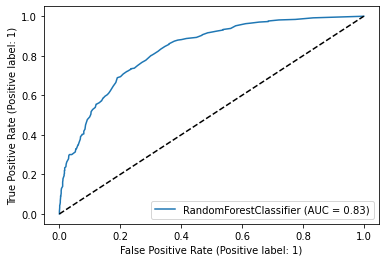

In [39]:
RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

We now try to use grid search to find better hyperparameters that improve the random forest model.

In [40]:
# Define the tuning parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [41]:
# Prediction with "best" parameters
y_pred = best_model.predict(X_test)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.6855123674911661
Recall: 0.5201072386058981
F1 Score: 0.5914634146341464
Accuracy: 0.8097941802696949


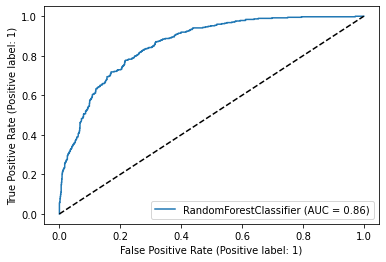

In [42]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

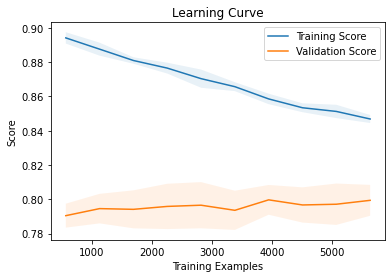

In [43]:
# Define the number of training examples
train_sizes = np.linspace(0.1, 1.0, 10)

# Define Model with the "best" parameters
rf_best = RandomForestClassifier(n_estimators=50, min_samples_split=10,max_depth=10)

# Learning curve scores
train_sizes, train_scores, val_scores = learning_curve(rf_best, X, y, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation for plots
ts_mean = np.mean(train_scores, axis=1)
ts_std = np.std(train_scores, axis=1)
vs_mean = np.mean(val_scores, axis=1)
vs_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, ts_mean, label='Training Score')
plt.plot(train_sizes, vs_mean, label='Validation Score')
plt.fill_between(train_sizes, ts_mean - ts_std, ts_mean + ts_std, alpha=0.1)
plt.fill_between(train_sizes, vs_mean - vs_std, vs_mean + vs_std, alpha=0.1)

# Create labels and title
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

## Voting Classifier

We use different ensemble to see if the accuracy could be improved or not.

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Split data
X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define the individual classifiers
classifier1 = xgb.XGBClassifier(scale_pos_weight=3)
classifier2 = SVC(kernel='rbf',degree=3, class_weight={0:1, 1:3}, probability=True)
classifier3 = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0:1,1:3}))
classifier4 = DecisionTreeClassifier()
classifier5 = KNeighborsClassifier(n_neighbors=5)

# Voting Classifier

ensemble = VotingClassifier(
    estimators=[('xgb', classifier1), ('svm', classifier2), ('log', classifier3), ('dt', classifier4), ('knn', classifier5)],
    voting='soft'  # Use majority voting
)

"""
ensemble = VotingClassifier(
    estimators=[('xgb', classifier1), ('log', classifier3), ('dt', classifier4)],
    voting='hard'  # Use majority voting
)
"""
ensemble.fit(X_train, y_train)

y_pred_prob = ensemble.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob>=0.5).astype(int)


# Metrics
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.5921787709497207
Recall: 0.5760869565217391
F1 Score: 0.5840220385674931
Accuracy: 0.7856635911994322


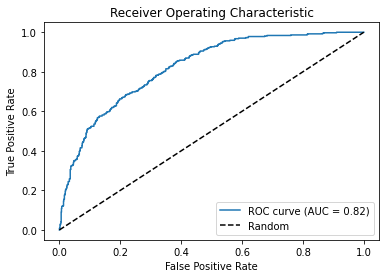

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

For the customer churn project, the privacy of the customers should be a top concern. Specifically, the dataset contains variables that may reveal customers' consuming habits in telecon services, and we want to protect the customers' privacy by eliminating the information that help identify individuals. Besides this, the customers should be notified that their data is used for the prediction. And fortuantely, the customers appearing in our dataset are anonymous, meaning that their privacy is protected. The id numbers in the dataset does not reveal any personal information, and thus it will not do harm to customers' privacy.When the models are trained and put into daily practice by the company, certain issues should be considered deliberately. For example, all the customers should be noted that their data would be used, and the customers should have the right to opt out anytime.  

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Team Expectations 

* Talk and provide ideas in group chat. Respond to messages.
* Manage deadlines effectively.
* Encourage active listening.
* Modify the notebook and notify others when good ideas pop out.
* Attending scheduled meeting on time.

# Project Timeline Proposal

|  Date  | Need to Complete  | Assignment |
|---|---|---|
| 5/14  | Pick Proposal      | Determine proposal and project | 
| 5/15  | Work on the proposal |                       | 
| 5/16  | Finish Proposal     |    |
| 5/17  | Finalize Proposal    | Data Cleaning and EDA   |
| 5/25  | Finalize wrangling/EDA; Begin programming for project | |
| 5/28  | Boosting and SVM                  |  |
| 5/30  | Logistic Regression | NA  |
| 5/31  | KNN and start to think about metrics and feature weights | NA  |
| 6/3  | Improve Models | NA  |

# Footnotes
<a name="name1n"></a>1.[^](#name1): K. Dahiya and S. Bhatia. Customer churn analysis in telecom industry. 2015 4th International Conference on Reliability.Infocom Technologies and Optimization (ICRITO.https://ieeexplore.ieee.org/abstract/document/7359318 <br>
<a name="name2n"></a>2.[^](#name2): Telco Customer Churn dataset. IBM Business Analytics. https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113 <br>
<a name="name3n"></a>3.[^](#name3):Suh, Y. Machine learning based customer churn prediction in home appliance rental business. J Big Data 10, 41 (2023). https://doi.org/10.1186/s40537-023-00721-8 <br>
<a name="name4n"></a>4.[^](#name4): Bhuse, P., Gandhi, A., Meswani, P., Muni, R., & Katre, N. (2020). Machine Learning Based Telecom-Customer Churn Prediction. 2020 3rd International Conference on Intelligent Sustainable Systems (ICISS), 1297-1301.https://www.semanticscholar.org/paper/Machine-Learning-Based-Telecom-Customer-Churn-Bhuse-Gandhi/daf8cc73ed7fb8f474cbfa111db0118edee4b5ee <br>
